In [2]:
import pandas as pd
import random 
import keras
import numpy as np

random.seed(42)

network_traffic = pd.read_csv("/home/hk633839/CN_Ml/archive/Train.txt", header=None)
network_traffic.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
network_traffic.to_csv("Train.csv", index=None)

2023-08-16 11:28:56.860309: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-16 11:28:58.683462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-16 11:28:58.694674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 11:29:01.487753: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
test_traffic = pd.read_csv("/home/hk633839/CN_Ml/archive/Test.txt", header=None)
test_traffic.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
test_traffic.to_csv("Test.csv", index=None)

In [4]:
count = network_traffic['attack'].value_counts()
print(count)
count = test_traffic['attack'].value_counts()
print(count)

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64
attack
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
h

In [5]:
network_traffic.drop(['land','urgent','num_failed_logins','num_outbound_cmds'],axis=1,inplace=True)
network_traffic['attack'].loc[network_traffic['attack'] != 'normal'] = 'attack'

/tmp/ipykernel_5853/4111573970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_traffic['attack'].loc[network_traffic['attack'] != 'normal'] = 'attack'


In [6]:
test_traffic.drop(['land','urgent','num_failed_logins','num_outbound_cmds'],axis=1,inplace=True)
test_traffic['attack'].loc[test_traffic['attack'] != 'normal'] = 'attack'

/tmp/ipykernel_5853/3864738093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_traffic['attack'].loc[test_traffic['attack'] != 'normal'] = 'attack'


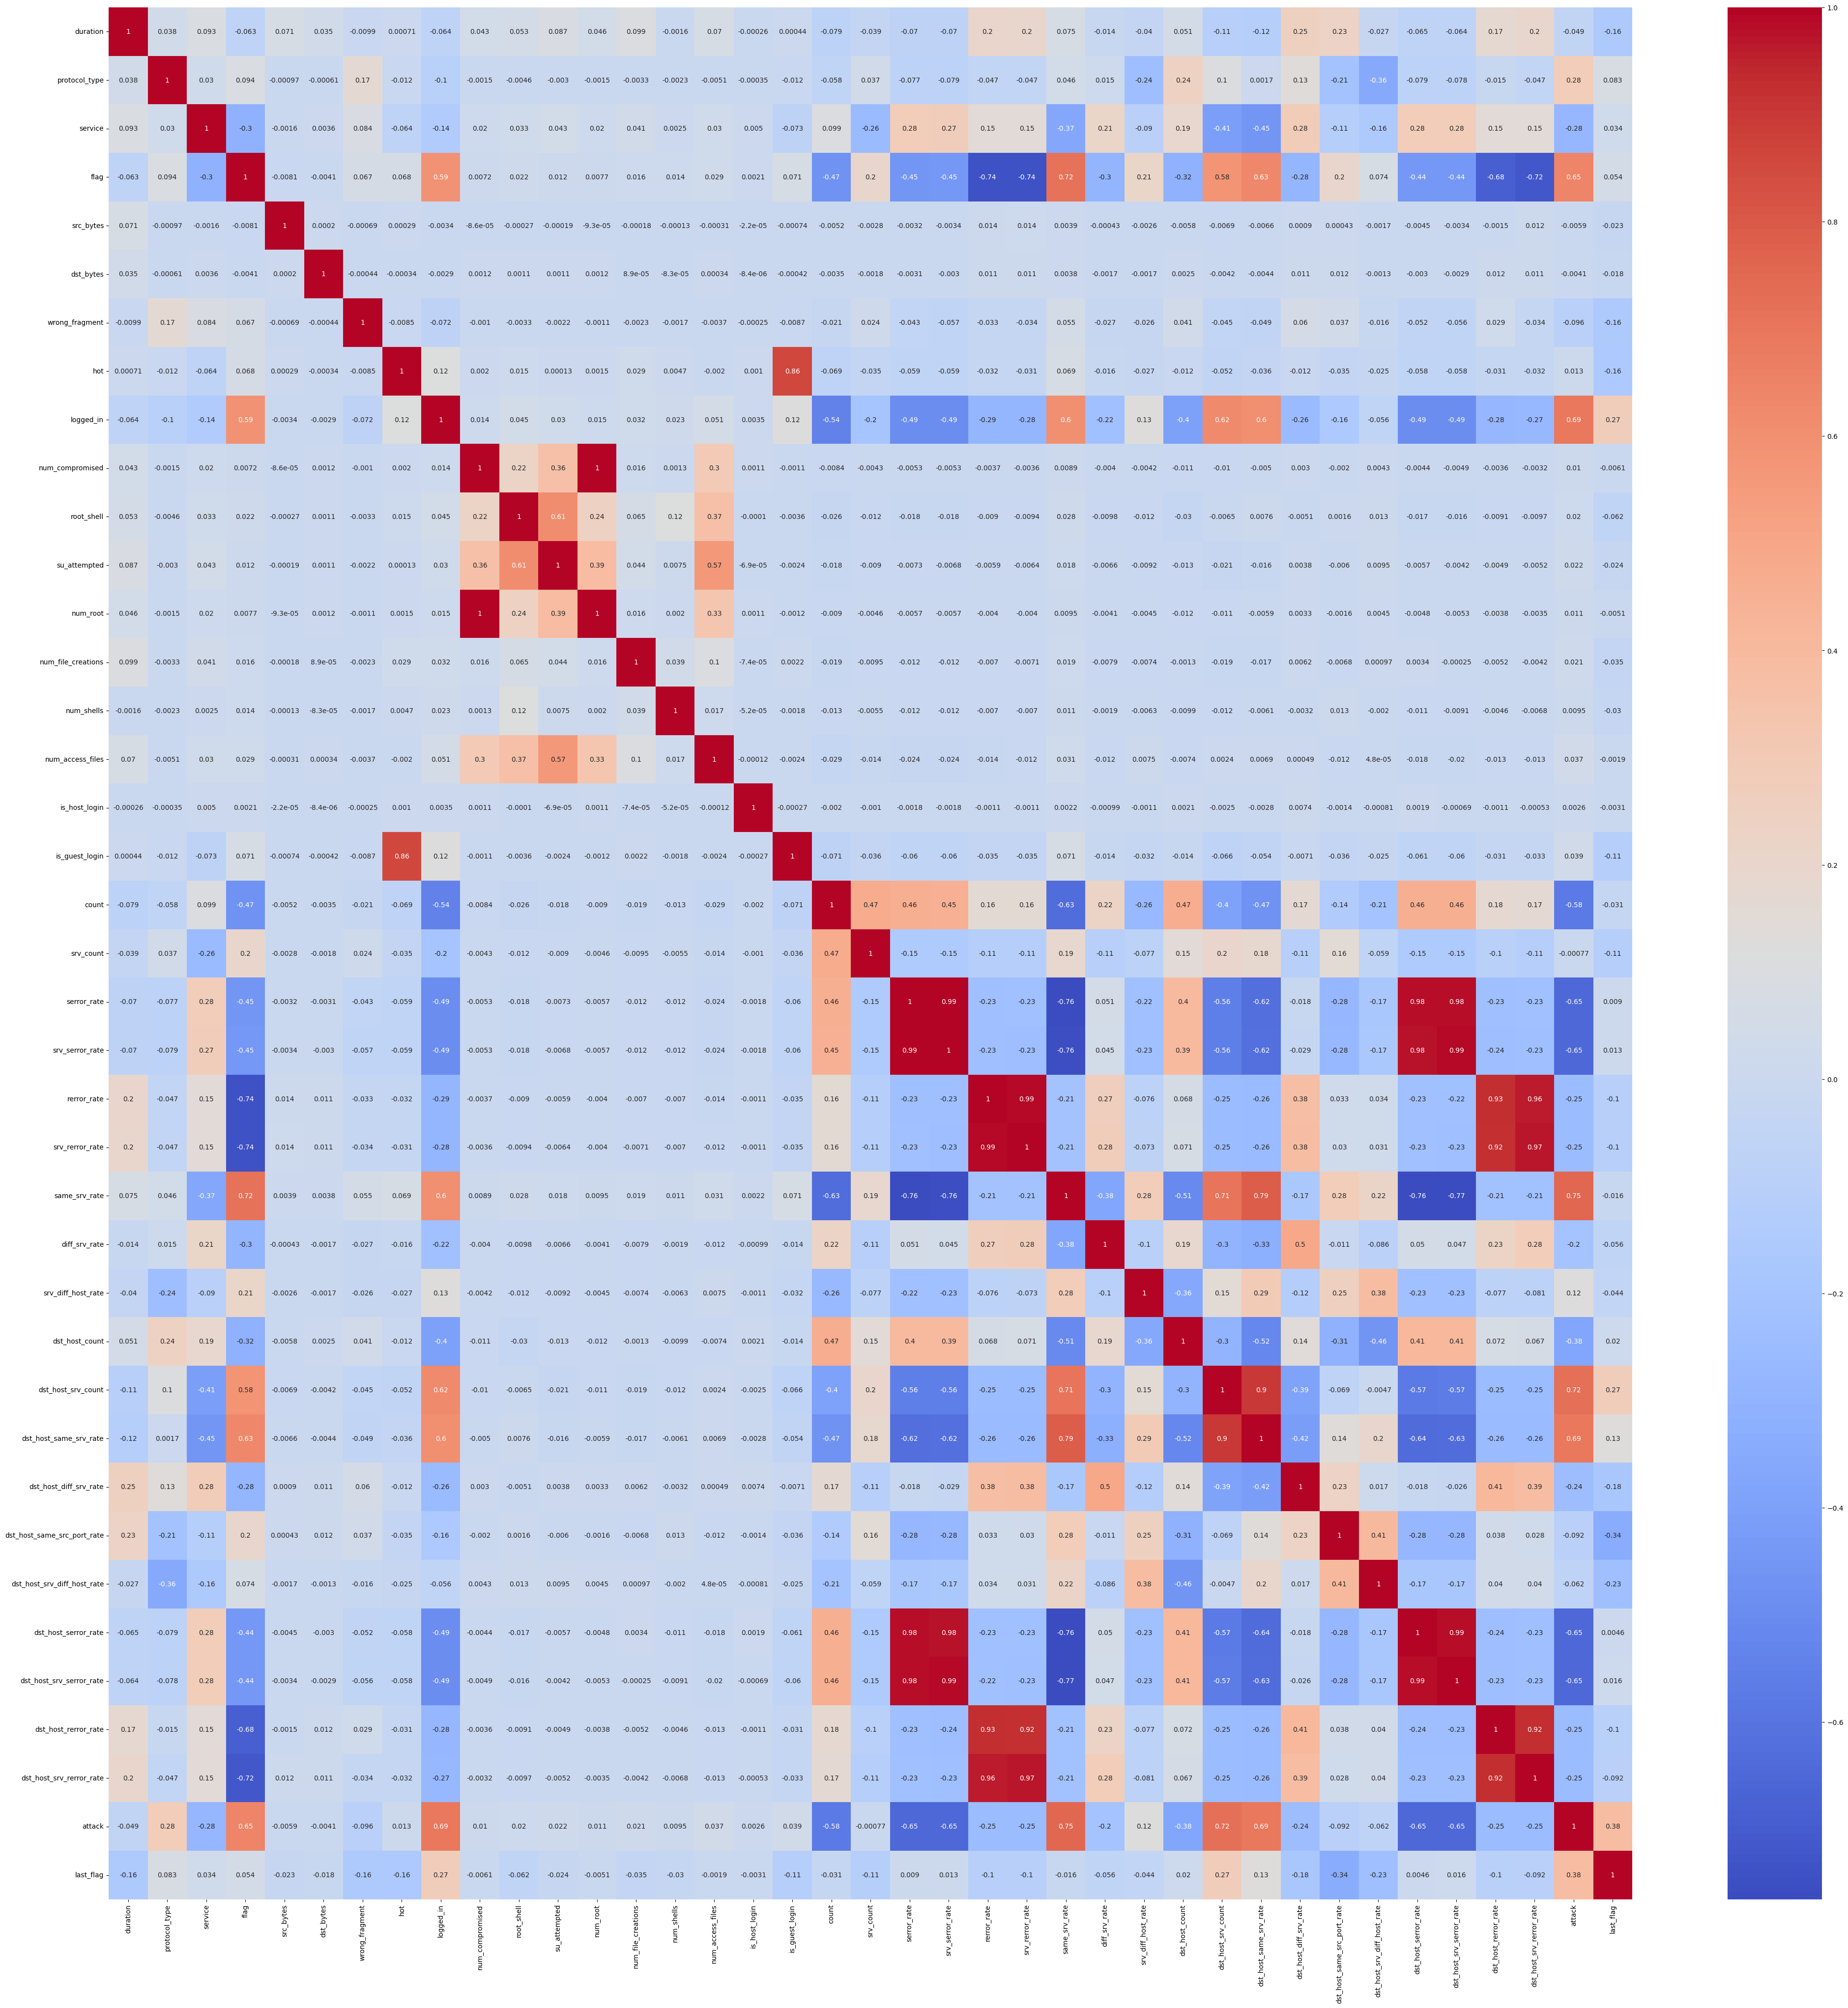

In [7]:
import seaborn as sb
import matplotlib.pyplot as mp
network_traffic.dropna(inplace=True)
test_traffic.dropna(inplace=True)
network_traffic['protocol_type'] = network_traffic['protocol_type'].astype('category').cat.codes
network_traffic['service'] = network_traffic['service'].astype('category').cat.codes
network_traffic['flag'] = network_traffic['flag'].astype('category').cat.codes
network_traffic['attack'] = network_traffic['attack'].astype('category').cat.codes
test_traffic['protocol_type'] = test_traffic['protocol_type'].astype('category').cat.codes
test_traffic['service'] = test_traffic['service'].astype('category').cat.codes
test_traffic['flag'] = test_traffic['flag'].astype('category').cat.codes
test_traffic['attack'] = test_traffic['attack'].astype('category').cat.codes
train_corr = network_traffic.corr()
plt_1 = mp.figure(figsize=(50, 50))
dataplot = sb.heatmap(train_corr, cmap="coolwarm", annot=True)
mp.show()

In [8]:
pos = 0
neg = 0
count = network_traffic['attack'].value_counts()
print(count)
count = test_traffic['attack'].value_counts()
print(count)

# 11 is assigned for the normal category value in attack column
# 16 is assigned for the normal category value in attack column


for ind in network_traffic.index:
    if(network_traffic['attack'][ind] == 11):
        pos += 1
    else:
        neg += 1
for ind in test_traffic.index:
    if(test_traffic['attack'][ind] == 16):
        pos +=  1
    else:
        neg += 1
print(pos, neg)

attack
1    67343
0    58630
Name: count, dtype: int64
attack
0    12833
1     9711
Name: count, dtype: int64
0 148517


In [9]:
x_train = network_traffic.drop('attack', axis=1)
y_train = network_traffic['attack']
x_test = test_traffic.drop('attack', axis=1)
y_test = test_traffic['attack']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_new = scaler.transform(x_train)

In [11]:
scaler.fit(x_test)
x_test_new = scaler.transform(x_test)

In [12]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [13]:
batch_size = 1000
seed = 42
initial_bias = np.log([pos/neg])
initial_bias

/tmp/ipykernel_5853/74568365.py:3: RuntimeWarning: divide by zero encountered in log
  initial_bias = np.log([pos/neg])


array([-inf])

In [14]:
import math
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Callback functions
def decay(lr):
    def decay_fn(epoch):
        return lr * 0.1 ** (epoch / 15)
    return decay_fn
decay_fn = decay(0.02)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(decay_fn)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

In [15]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv1D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv1D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool1D(padding = 'same')
    ]
    )
    
    return block

In [16]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [17]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(38,1)),
        
        tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool1D(padding = 'same'),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 16)            64        
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 16)            784       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 16)            0         
 D)                                                              
                                                                 
 sequential (Sequential)     (None, 10, 32)            1872      
                                                                 
 sequential_1 (Sequential)   (None, 5, 64)             6816      
                                                                 
 sequential_2 (Sequential)   (None, 3, 128)            25920     
                                                      

In [18]:
# Set the training parameters
METRICS = ['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')]
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = METRICS)

In [19]:
EPOCHS = 100
# Train the model
history = model.fit(x_train, y_train, batch_size, epochs = EPOCHS, validation_data = [x_test, y_test], verbose = 1, callbacks = [lr_scheduler, early_stopping])

Epoch 1/100
126/126 [==============================] - 15s 86ms/step - loss: 0.2362 - accuracy: 0.8888 - recall: 0.9143 - precision: 0.8819 - val_loss: 1.9932 - val_accuracy: 0.4308 - val_recall: 1.0000 - val_precision: 0.4308 - lr: 0.0200
Epoch 2/100
126/126 [==============================] - 11s 84ms/step - loss: 0.0755 - accuracy: 0.9712 - recall: 0.9705 - precision: 0.9755 - val_loss: 6.6599 - val_accuracy: 0.4308 - val_recall: 1.0000 - val_precision: 0.4308 - lr: 0.0172
Epoch 3/100
126/126 [==============================] - 11s 84ms/step - loss: 0.0878 - accuracy: 0.9696 - recall: 0.9668 - precision: 0.9761 - val_loss: 6.0249 - val_accuracy: 0.4308 - val_recall: 1.0000 - val_precision: 0.4308 - lr: 0.0147
Epoch 4/100
126/126 [==============================] - 11s 84ms/step - loss: 0.0614 - accuracy: 0.9795 - recall: 0.9747 - precision: 0.9868 - val_loss: 0.8179 - val_accuracy: 0.5652 - val_recall: 0.0024 - val_precision: 0.1679 - lr: 0.0126
Epoch 5/100
126/126 [===================

In [20]:
model.save('Attack_Detection.keras')